In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from glob import glob

import matplotlib as mpl
import matplotlib.pyplot as plt
from fastcore.xtras import load_pickle

import matplotx
import numpy as np
import pandas as pd

from scipy.stats import sem

from gptchem.plotsettings import *

%matplotlib inline

In [3]:
all_res = glob("out/**/*.pkl")

In [4]:
compiled_res = []
compiled_gpr = []

for res in all_res:
    loaded = load_pickle(res)
    repre = loaded["representation"]
    num_points = loaded["num_train_points"]

    metrics = {
        "representation": loaded["representation"],
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["mean_absolute_error"],
        "max_error": loaded["max_error"],
        "mse": loaded["mean_squared_error"],
    }

    compiled_res.append(metrics)

    gpr_metrics = {
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["gpr_baseline"]["mean_absolute_error"],
        "max_error": loaded["gpr_baseline"]["max_error"],
        "mse": loaded["gpr_baseline"]["mean_squared_error"],
    }

    compiled_gpr.append(gpr_metrics)

In [5]:
compiled_res = pd.DataFrame(compiled_res)
compiled_gpr = pd.DataFrame(compiled_gpr)

In [6]:
compiled_grouped_res = compiled_res.groupby(["representation", "num_train_points"]).agg(
    ["mean", "std", "count", sem]
)

In [7]:
compiled_gpr_grouped = compiled_gpr.groupby(["num_train_points"]).agg(["mean", "std", sem])

In [8]:
compiled_grouped_res

mae                               \
                                       mean         std count        sem   
representation num_train_points                                            
SMILES         10                 59.133152    8.856563     3        NaN   
               20                 66.935352   12.684051     8        NaN   
               50                 38.860687    2.535774     8   0.896532   
               100                34.215408    3.987879     8   1.409928   
               200                28.156931    4.250790     7        NaN   
inchi          10                122.532881   30.963077     8  10.947101   
               20                 56.353120   14.785678     8   5.227527   
               50                 38.661000    3.726683     9   1.242228   
               100                37.460414    4.249823     9   1.416608   
               200                27.045440    3.699894     9   1.233298   
name           10                       NaN         NaN     0        NaN   
               20                289.866222  154.890492     2        NaN   
               50                 86.648174   59.466037     7  22.476049   
               100                41.389176   10.415074     8   3.682285   
               200                30.890190    5.832380     7   2.204433   
selfies        10                 61.644294    7.161938     6        NaN   
               20                 60.247081   13.268126    11   4.000491   
               50                 39.913199    4.709265    10        NaN   
               100                34.539729    3.341989    11        NaN   
               200                31.005451    4.677625    12        NaN   

                                  max_error                               \
                                       mean         std count        sem   
representation num_train_points                                            
SMILES         10                175.000000   33.181320     3        NaN   
               20                165.500000   21.320681     8        NaN   
               50                197.250000   57.135803     8  20.200557   
               100               172.125000   54.270322     8  19.187456   
               200               253.285714  181.261978     7        NaN   
inchi          10                343.875000   85.011659     8  30.056160   
               20                188.625000   62.962432     8  22.260581   
               50                166.111111   45.731402     9  15.243801   
               100               244.111111   85.553265     9  28.517755   
               200               156.222222   21.241338     9   7.080446   
name           10                       NaN         NaN     0        NaN   
               20                473.749400   93.690800     2        NaN   
               50                175.857143   40.147348     7  15.174271   
               100               159.625000   33.273488     8  11.763954   
               200               120.142857   48.057010     7  18.163842   
selfies        10                246.666667   35.330818     6        NaN   
               20                215.272727   69.378802    11  20.918496   
               50                213.860000   72.466210    10        NaN   
               100               190.363636   54.555060    11        NaN   
               200               227.583333  122.666924    12        NaN   

                                           mse                      \
                                          mean           std count   
representation num_train_points                                      
SMILES         10                  5631.299114    936.646142     3   
               20                  6855.647659   2148.480418     8   
               50                  3099.040537    273.588300     8   
               100                 2372.072706    517.431382     8   
               200                 2407.061154   164

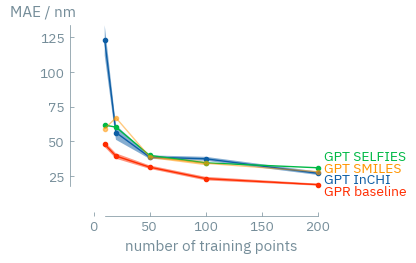

In [10]:
# with plt.style.context(matplotx.styles.dufte):
fig, ax = plt.subplots(1, 1)

ax.plot(
    compiled_grouped_res.loc["inchi", :].index,
    compiled_grouped_res.loc["inchi", :]["mae"]["mean"],
    label="GPT InCHI",
    marker="o",
)

ax.fill_between(
    compiled_grouped_res.loc["inchi", :].index,
    compiled_grouped_res.loc["inchi", :]["mae"]["mean"]
    - compiled_grouped_res.loc["inchi", :]["mae"]["sem"],
    compiled_grouped_res.loc["inchi", :]["mae"]["mean"]
    + compiled_grouped_res.loc["inchi", :]["mae"]["sem"],
    alpha=0.5,
)

ax.plot(
    compiled_grouped_res.loc["selfies", :].index,
    compiled_grouped_res.loc["selfies", :]["mae"]["mean"],
    label="GPT SELFIES",
    marker="o",
)

ax.fill_between(
    compiled_grouped_res.loc["selfies", :].index,
    compiled_grouped_res.loc["selfies", :]["mae"]["mean"]
    - compiled_grouped_res.loc["selfies", :]["mae"]["sem"],
    compiled_grouped_res.loc["selfies", :]["mae"]["mean"]
    + compiled_grouped_res.loc["selfies", :]["mae"]["sem"],
    alpha=0.5,
)

ax.plot(
    compiled_grouped_res.loc["SMILES", :].index,
    compiled_grouped_res.loc["SMILES", :]["mae"]["mean"],
    label="GPT SMILES",
    marker="o",
    alpha=0.5,
)

ax.fill_between(
    compiled_grouped_res.loc["SMILES", :].index,
    compiled_grouped_res.loc["SMILES", :]["mae"]["mean"]
    - compiled_grouped_res.loc["SMILES", :]["mae"]["sem"],
    compiled_grouped_res.loc["SMILES", :]["mae"]["mean"]
    + compiled_grouped_res.loc["SMILES", :]["mae"]["sem"],
    alpha=0.5,
)

ax.plot(
    compiled_gpr_grouped.loc[:].index,
    compiled_gpr_grouped["mae"]["mean"],
    label="GPR baseline",
    marker="o",
)

ax.fill_between(
    compiled_gpr_grouped.loc[:].index,
    compiled_gpr_grouped.loc[:]["mae"]["mean"] - compiled_gpr_grouped.loc[:]["mae"]["sem"],
    compiled_gpr_grouped.loc[:]["mae"]["mean"] + compiled_gpr_grouped.loc[:]["mae"]["sem"],
    alpha=0.5,
)

matplotx.line_labels()

ax.set_xlabel("number of training points", labelpad=4)
ylabel_top("MAE / nm", y_pad=-0.03)

range_frame(
    ax,
    compiled_gpr_grouped.loc[:].index,
    np.stack(
        [compiled_gpr_grouped.loc[:]["mae"]["mean"] - compiled_gpr_grouped.loc[:]["mae"]["sem"],   compiled_grouped_res.loc["inchi", :]["mae"]["mean"]
    + compiled_grouped_res.loc["inchi", :]["mae"]["sem"]]
    ).flatten()
)
# ax.set_xscale('log')
# ax.set_yscale('symlog')
fig.savefig("phoswitch_regression_res.pdf", bbox_inches="tight")